In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/My Drive/import')

Mounted at /content/gdrive/


In [7]:
import pandas as pd
import edhec_risk_kit_206 as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857


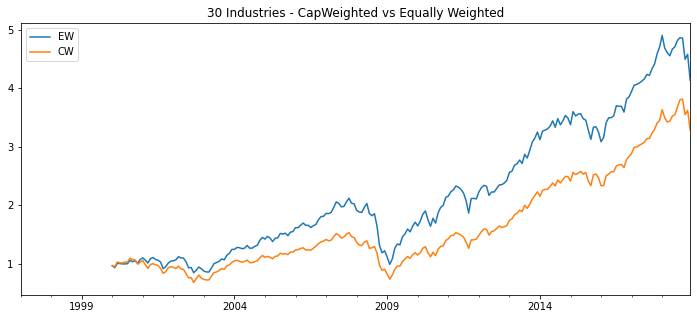

In [10]:
        
#%% Q 1-4

ind_rets =  erk.get_ind_file('returns', 'vw', n_inds=30)
ind_rets = ind_rets.loc['1997':'2018', :]    

mkt_caps = erk.get_ind_market_caps(n_inds=30, weights=False)
mkt_caps = mkt_caps.loc['1997':'2018', :]  

ewr = erk.backtest_ws(ind_rets, estimation_window=36)
cwr = erk.backtest_ws(ind_rets, weighting=erk.weight_cw, cap_weights=mkt_caps
                      , estimation_window=36)
btr = pd.DataFrame({"EW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,5), title="30 Industries - CapWeighted vs Equally Weighted")
erk.summary_stats(btr.dropna())
# =============================================================================
# 1. 6.45
# 2. 15.13
# 3. 7.76
# 4. 15.87
# =============================================================================

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857


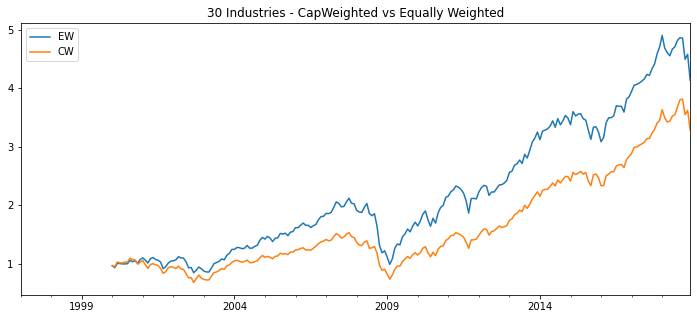

In [13]:
ewtr = erk.backtest_ws(ind_rets, estimation_window=36, cap_weights=mkt_caps
                      , max_cw_mult=2, microcap_threshold=.01)

btr = pd.DataFrame({"EW": ewtr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,5), title="30 Industries - CapWeighted vs Equally Weighted")
erk.summary_stats(btr.dropna())
# =============================================================================
# 5. 7.76
# 6. 15.87 ??
# 7. 18.74
# 8. 18.74 ??
# =============================================================================

In [14]:
erk.tracking_error(ewr, cwr),erk.tracking_error(ewtr, cwr)

(0.18736759551222995, 0.18736759551222995)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
CW,0.064564,0.151274,-0.552933,4.248421,0.070982,0.098269,0.222191,-0.518857
GMV-Sample,0.066306,0.117410,-0.741087,4.469212,0.055456,0.080583,0.300815,-0.421289
GMV-Shrink 0.25,0.068467,0.114572,-0.731292,4.264940,0.053884,0.077715,0.326631,-0.393410


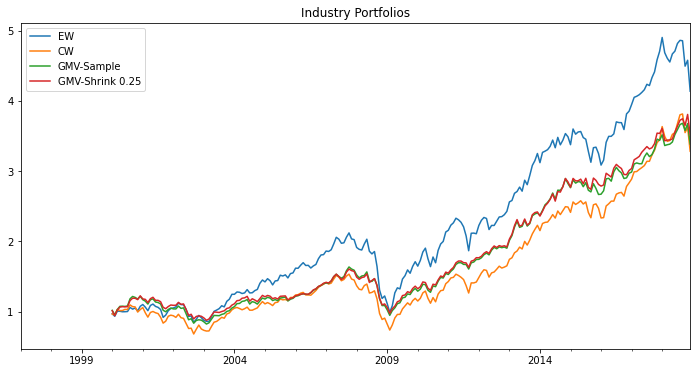

In [15]:
mv_s_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_gmv
                         , cov_estimator=erk.sample_cov)

mv_sh_r = erk.backtest_ws(ind_rets, estimation_window=36, 
                          weighting=erk.weight_gmv, 
                          cov_estimator=erk.shrinkage_cov, delta=0.25)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r,
                    'GMV-Shrink 0.25': mv_sh_r})


(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())


# =============================================================================
# 9. 6.63
# 10. 11.74
# 11. 6.85
# 12. 11.46
# =============================================================================